In [1]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("data/data.csv")

In [3]:
all_df['class']= all_df['class'].map({'RB':0, 'NRB': 1}).astype(int)

In [4]:
X=all_df.drop(['class'], axis=1).values.astype('float64')

In [5]:
Y = all_df['class'].values.astype('int64')

In [6]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

844

In [7]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [8]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [9]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [10]:
model = Sequential()

In [11]:
model.add(SimpleRNN(units=41, input_shape=(41,1)))

In [12]:
model.add(Dense(1, activation = "sigmoid"))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 41)                1763      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 42        
Total params: 1,805
Trainable params: 1,805
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [15]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=30,verbose=1,callbacks=[early_stopping])

Train on 675 samples, validate on 169 samples
Epoch 1/30
675/675 [==============================] - 4s 5ms/step - loss: 0.5769 - acc: 0.6889 - val_loss: 0.4447 - val_acc: 0.8225
Epoch 2/30
675/675 [==============================] - 0s 731us/step - loss: 0.4260 - acc: 0.8059 - val_loss: 0.3787 - val_acc: 0.8698
Epoch 3/30
675/675 [==============================] - 1s 1ms/step - loss: 0.3858 - acc: 0.8430 - val_loss: 0.3592 - val_acc: 0.8580
Epoch 4/30
675/675 [==============================] - 1s 1ms/step - loss: 0.3831 - acc: 0.8326 - val_loss: 0.3391 - val_acc: 0.8876
Epoch 5/30
675/675 [==============================] - 1s 1ms/step - loss: 0.3720 - acc: 0.8415 - val_loss: 0.3471 - val_acc: 0.8639
Epoch 6/30
675/675 [==============================] - 1s 1ms/step - loss: 0.3558 - acc: 0.8430 - val_loss: 0.3317 - val_acc: 0.8521
Epoch 7/30
675/675 [==============================] - 1s 1ms/step - loss: 0.3481 - acc: 0.8548 - val_loss: 0.3191 - val_acc: 0.8757
Epoch 8/30
675/675 [========

In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

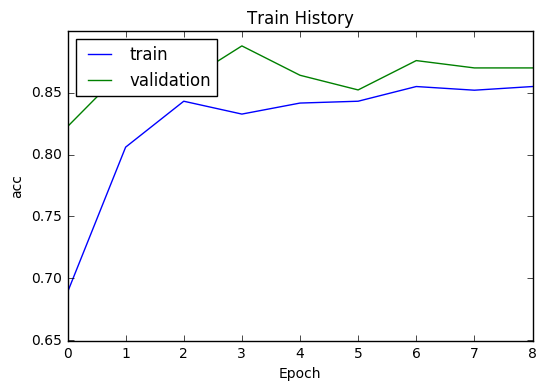

In [17]:
show_train_history(train_history,'acc','val_acc')

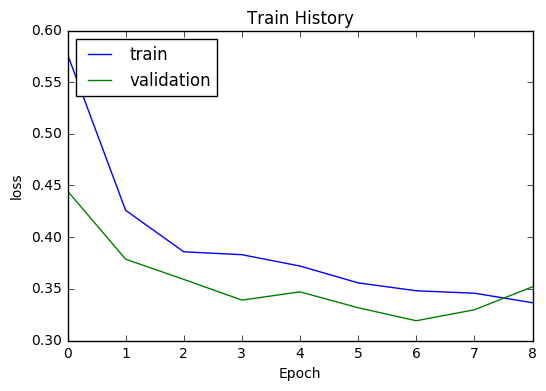

In [18]:
show_train_history(train_history,'loss','val_loss')

In [19]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

211/211 [==============================] - 0s 520us/step


In [20]:
scores[1]

0.8151658753648189